In [117]:
import os
import pandas as pd
import torch
import numpy as np
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from skimage import io
import torchvision.transforms as transforms

### 3.2 自定义数据集

In [118]:
class CatsAndDogsDataset(Dataset):
    def __init__(self,csv_file,root_dir,transform=None):
        self.annotations =pd.read_csv(os.path.join(root_dir,csv_file))
        self.root_dir=root_dir
        self.transform=transform
    
    def __len__(self):
        return len(self.annotations)
    
    def __getitem__(self,index):
        img_path=os.path.join(self.root_dir,self.annotations.iloc[index,0])
        image = io.imread(img_path)
        y_label= torch.tensor(int(self.annotations.iloc[index,1]))
        
        if self.transform:
            image= self.transform(image)
        
        return (image,y_label)

In [119]:
dataset = CatsAndDogsDataset(csv_file='label.csv',root_dir='data/cat_dog',transform=transforms.ToTensor())
training_data,test_data = torch.utils.data.random_split(dataset,[3,1])
batch_size=1
train_dataloader = DataLoader(training_data, batch_size=batch_size,shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size,shuffle=True)

In [143]:
for X, y in test_dataloader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break

Shape of X [N, C, H, W]:  torch.Size([1, 3, 641, 428])
Shape of y:  torch.Size([1]) torch.int64


In [144]:
to_pil_image = transforms.ToPILImage()
img = to_pil_image(X[0])
img.show()

### 3.3 数据变换

In [39]:
import matplotlib.pyplot as plt

#### 3.3.1 对图像做变换

In [38]:
resize1 = transforms.Resize(100)
resize2 = transforms.Resize((100,200))

In [79]:
def plot(*imgs):
    fig, axs = plt.subplots(nrows=1,ncols=3,figsize=(10, 10))
    for i in range(len(imgs)):
        axs[i].imshow(np.asarray(imgs[i]))

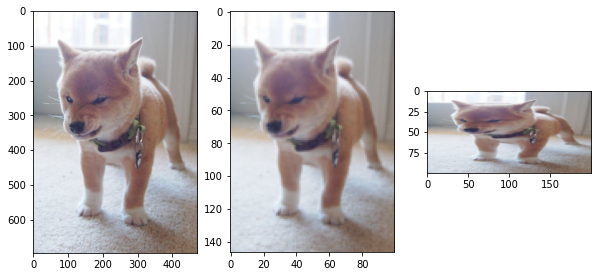

In [142]:
plot(img,resize1(img),resize2(img))

In [136]:
mean = next(iter(test_dataloader))[0].mean()
std=next(iter(test_dataloader))[0].std()
print('mean of input : {}'.format(mean))
print('std of input : {}'.format(std))

mean of input : 0.43933048844337463
std of input : 0.2347354143857956


In [149]:
trans= transforms.Compose([transforms.ToTensor(),transforms.Normalize(mean,std)])
print('mean of input : {}'.format(trans(img).mean()))
print('std of input : {}'.format(trans(img).std()))

mean of input : -1.1390642384867533e-07
std of input : 0.9999999403953552
